# Acknowledgements

This code was written by following the TesorFlow guide "Text classification with an RNN". This RNN is trained on the IMDB large movie review dataset. The sample text in the last codeblock can be changed to any movie review. The RNN will then output whether it's a positive or a negative review.

---

### Sources
Maas, A., Daly, R., Pham, P., Huang, D., Ng, A., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In *Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies* (pp. 142–150). Association for Computational Linguistics.

TensorFlow Developers. (2023, March). Version (v2.12.0). *TensorFlow*. Zenodo. Retrieved from https://doi.org/10.5281/zenodo.7764425. 

# Imports

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Dataset

In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVC32V/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVC32V/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNVC32V/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


# Text encoder

In [3]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

# Model

In [4]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

# Training

In [5]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 846s 2s/step - loss: 0.6372 - accuracy: 0.5645 - val_loss: 0.4839 - val_accuracy: 0.7620
Epoch 2/10
391/391 [==============================] - 817s 2s/step - loss: 0.3969 - accuracy: 0.8187 - val_loss: 0.3624 - val_accuracy: 0.8469
Epoch 3/10
391/391 [==============================] - 819s 2s/step - loss: 0.3377 - accuracy: 0.8531 - val_loss: 0.3404 - val_accuracy: 0.8422
Epoch 4/10
391/391 [==============================] - 808s 2s/step - loss: 0.3283 - accuracy: 0.8556 - val_loss: 0.3319 - val_accuracy: 0.8422
Epoch 5/10
391/391 [==============================] - 804s 2s/step - loss: 0.3127 - accuracy: 0.8646 - val_loss: 0.3240 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 807s 2s/step - loss: 0.3084 - accuracy: 0.8669 - val_loss: 0.3310 - val_accuracy: 0.8599
Epoch 7/10
391/391 [==============================] - 795s 2s/step - loss: 0.3054 - accuracy: 0.8674 - val_loss: 0.3240 - val_accuracy: 0.8599

In [6]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 192s 492ms/step - loss: 0.3162 - accuracy: 0.8566
Test Loss: 0.31620848178863525
Test Accuracy: 0.8565599918365479


(0.0, 0.6541874364018441)

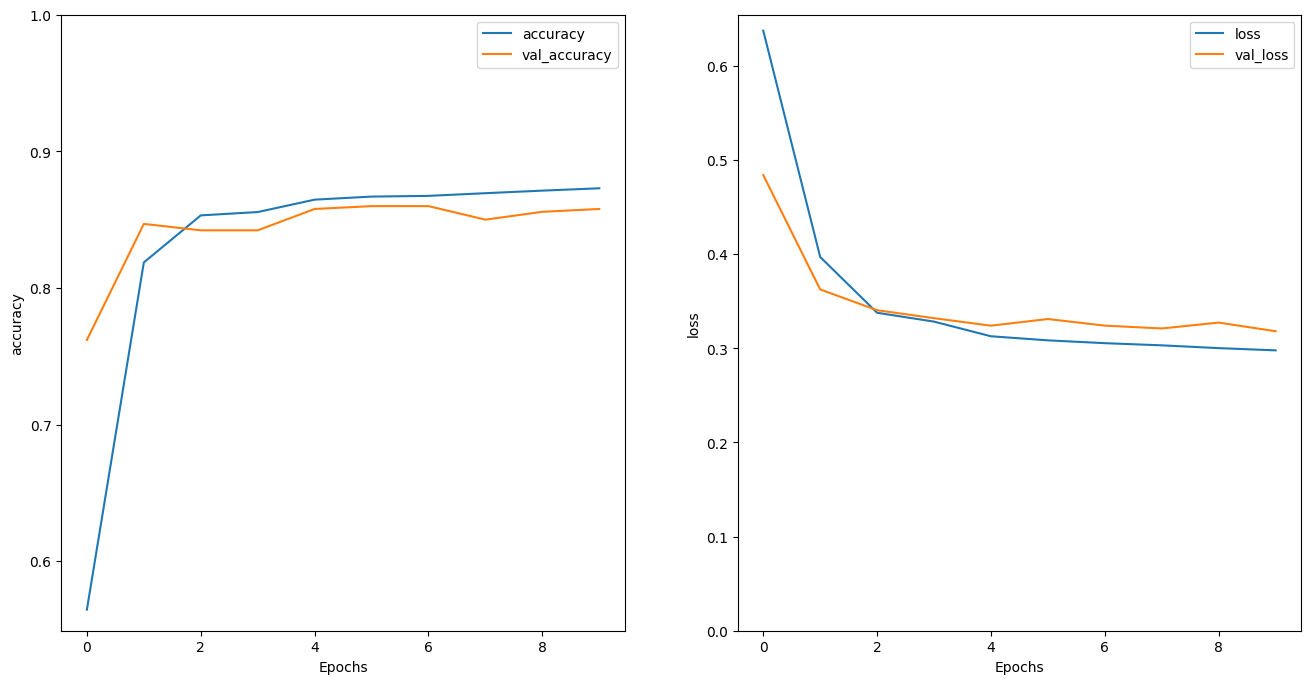

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [8]:
sample_text = ('Amazing movie! 10/10, would recommend.')
predictions = model.predict(np.array([sample_text]))
if predictions >= 0:
  print("positive")
else:
  print("negative")

1/1 [==============================] - 3s 3s/step
positive


In [9]:
sample_text = ('This movie sucked. My time would\'ve been spent better watching paint dry.')
predictions = model.predict(np.array([sample_text]))
if predictions >= 0:
  print("positive")
else:
  print("negative")

1/1 [==============================] - 0s 25ms/step
negative
